# T3b · Different Splits and Model Evaluation in Drug Discovery

**Note:** This talktorial is a part of [CADDSeminar_2024](https://github.com/volkamerlab/CADDSeminar_2024), a repository that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects.

Authors:

- Zyad Barghouth, 2024/2025, CADD Seminar, Universität des Saarlandes
- Sunag Parasu Nagesh, 2024/2025, CADD Seminar, Universität des Saarlandes
- Michael Backenköhler, 2024/2025, [Volkamer lab](https://volkamerlab.org), Universität des Saarlandes

## Aim of this talktorial

- Understand the importance of dataset splitting strategies for realistic model evaluation.
- Implement scaffold, random, and Butina-based splitting techniques.
- Train and evaluate machine learning models on molecular datasets.
- Perform statistical comparisons using Tukey's HSD test to assess model performance.


### Contents in *Theory*

* Information leakage
* Molecular fingerprints
* Different splits in drug discovery and their significance on the results
* Machine learning models
* Cross validation
* Difference between Parameteric and non-Parameteric tests and which one to use in drug discovery

### Contents in *Practical*

* Data Loading and Preprocessing
* Generating Different Clusters
* Model Training and Evaluation
* Non-Parameteric Comparison

### References

* Walters, P. (2019) Multiple comparisons, non-parametric statistics, and Post-Hoc Tests, Multiple Comparisons, Non-Parametric Statistics, and Post-Hoc Tests. Available [here](https://practicalcheminformatics.blogspot.com/2019/03/multiple-comparisons-non-parametric.html).
* Ash, J.R. et al. (2024) Practically significant method comparison protocols for machine learning in small molecule drug discovery. [ChemRxiv (2024)](https://chemrxiv.org/engage/chemrxiv/article-details/672a91bd7be152b1d01a926b).
* Rdkit.chem.scaffolds.MurckoScaffold module rdkit.Chem.Scaffolds.MurckoScaffold module - The RDKit 2024.09.4 [documentation](https://www.rdkit.org/docs/source/rdkit.Chem.Scaffolds.MurckoScaffold.html).
* Qianrong Guo, Saiveth Hernandez-Hernandez, Pedro J Ballester. Scaffold Splits Overestimate Virtual Screening Performance. [arXiv (2024)](https://arxiv.org/abs/2406.00873)
* Backenköhler, M. et al. (2024) Guided docking as a data generation approach facilitates structure-based machine learning on kinases. [ChemRxiv (2024)](https://chemrxiv.org/engage/chemrxiv/article-details/661697e091aefa6ce142c9d8)
* Walters, P. (2024) Some thoughts on splitting chemical datasets, Some Thoughts on Splitting Chemical Datasets. Available [here](https://practicalcheminformatics.blogspot.com/2024/11/some-thoughts-on-splitting-chemical.html).
* Seo, M., Shin, H.K., Myung, Y. et al. Development of Natural Compound Molecular Fingerprint (NC-MFP) with the Dictionary of Natural Products (DNP) for natural product-based drug development. [J Cheminform 12, 6 (2020).](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-0410-3)


## Theory

### Information Leakage

Information leakage is one of the major problems in Machine Learning. It occurs when the training data has information the model is trying to predict. In the context of drug discovery, it can occur in two different ways:
1. Same samples in multiple splits
2. Having samples that are too similar in the splits, like having paracetamol and phenacetin in the training data, which share similar drug properties.

Therefore, detecting information leakage and thereby deducing true model performance is essential for drug discovery where ML models are used to find a new use of drugs, predict drug-protein interactions, discover drug efficacy, ensure safety biomarkers, and optimize the bioactivity of molecules.

### Fingerprints

 A molecular fingerprint is a unique pattern or representation of a molecule’s chemical structure and properties. It is used in cheminformatics and computational chemistry for tasks such as molecular similarity analysis, virtual screening, and drug discovery. Molecular fingerprints encode information about a molecule’s atoms, bonds, and various structural features, allowing for efficient comparisons and predictions in the field of molecular modeling and drug design.

The use of molecular fingerprints in cheminformatics and computational chemistry is a fundamental and versatile approach for representing chemical compounds. Molecular fingerprints are essentially a series of bits, often in binary form, that encode the presence or absence of specific chemical substructures or molecular properties in a molecule. These fingerprints serve as a compact and informative representation of molecules and are extensively used in various applications, ranging from similarity searching and clustering to quantitative structure-activity relationship (QSAR) modeling and virtual screening in drug discovery.

![fingerprint](/images/fingerprint.png)
*Figure 1:* Substructure key-based fingerprints. represent substructure features of the compound based on the list of structural keys.

### Different splits in drug discovery and their significance on the results

Over the years, multiple methods have emerged for splitting a dataset containing chemical structures. Here, we aim to show how different splitting methods perform with a dataset of our choosing.

In this talktorial, we talk about 3 different methods of dataset splitting.

### Scaffold Splitting
In scaffold splitting, we create Bemis-Murcko Scaffolds for each molecule in our dataset. It is a framework introduced by Guy Bemis and Mark Murcko. In this framework, a molecule is broken down to its ring systems, linkers and side chains. The scaffold of the molecule would only consist of the ring systems and linkers. The reason we use scaffolds is that scaffolds provide a foundational structure for drug optimization and systematic exploration of the chemical space, enabling chemists to create related compounds with enhanced pharmacological properties.

![scaffold](/images/scaffold.png)

*Figure 2:* Example of scaffold formation. The scaffold only consists of the ring systems and the linkers.

### Random Splitting
In random splitting, each molecule is treated as a cluster and the data is subsequently split. This method can be used as a control to compare against other splitting methods.

### Butina Splitting
In butina splitting, we cluster molecules based on their molecular fingerprints, so that ones with similar fingerprints will tend to be in the same dataset. The time required by this splitting algorithm scales as the square of the number of molecules, so it is mainly useful for small to medium sized datasets. Please refer **T005 - Compound clustering** to get a deeper understanding of the Butina algorithm.

![butina](/images/butina.jpeg)
*Figure 3*: This figure shows the process of butina clustering. The algorithm uses Tanimoto similarity scores with a cutoff to determine clusters.

### Machine learning models

In this talktorial, we use the linear regression, random forest regressor, logistic regression and random forest classifier models to evaluate the training and test datasets generated by each of the 3 splitting methods.

**Linear regression** is a model that estimates the linear relationship between a dependent variable and one or more explanatory variables. It is mathematically defined as:
$$
y = \beta_0 + \beta_1 x + \epsilon
$$

**Random forests** or random decision forests is an ensemble learning method for classification, regression and other tasks that works by creating a multitude of decision trees during training. For regression tasks, the output is the average of the predictions of the trees. If we denote:
* $N$: the total number of trees in the forest,
* $h(x; \Theta_i)$: the prediction of the $i$-th tree for input $x$, where $\Theta_i$ represents the parameters of the $i$-th tree,

The Random Forest prediction $\hat{y}$ for input $x$ is:
$$
\hat{y} = \frac{1}{N} \sum_{i=1}^N h(x; \Theta_i)
$$

**Logistic regression** is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors. It is mathematically defined for $k$ classes $(C_1,C_2,…,C_k)$ as:
$$
P(y = C_k \mid \mathbf{x}) = \frac{e^{\mathbf{w}_k^\top \mathbf{x} + b_k}}{\sum_{j=1}^K e^{\mathbf{w}_j^\top \mathbf{x} + b_j}}
$$
where:
* $w_k$ is the weight vector for class $C_k$.
* $b_k$ is the bias term for class $C_k$.
* $x$ is the input feature vector.
* $K$ is the total number of classes.
* $P(y=C_k∣x)P(y=C_k​∣x)$ is the predicted probability for class $C_k$.

The predicted class is the one with the highest probability:
$$
\hat{y} = \arg \max_{k} P(y = C_k \mid \mathbf{x})
$$

In the case of **random forest classifiers**, A single decision tree $T_t$ predicts the class $C_k$ for an input $x$:
$$
T_t(\mathbf{x}) = C_k
$$
The model aggregates predictions from $N$ decision trees using majority voting for classification. The predicted class is:
$$
\hat{y} = \arg \max_{k} \sum_{t=1}^N \mathbb{I}(T_t(\mathbf{x}) = C_k)
$$
where:
* $I$ is the indicator function $(I(condition)=1$ if the condition is true, otherwise $0$).
* $N$ is the total number of decision trees.
* $C_k$ is one of the $K$ possible classes.

### Cross validation

In this talktorial, we perform 5-fold cross-validation. It is a statistical method used to evaluate the performance of a machine learning model. It involves splitting the dataset into five subsets, or "folds", and using these folds in a systematic way to train and test the model. In this talktorial, we will be using the MAE (Mean Absolute Error) during cross validation.

When to Use 5-Fold Cross-Validation:
* When we want a balanced trade-off between computational cost and model evaluation reliability.
* Commonly used in small to medium-sized datasets where a single train-test split might not be representative of the entire data.

![cv](/images/cv.png)
*Figure 4:* Simplest form of 5 - fold cross validation. In our talktorial, the folds are made by preserving a percentage of samples for each class.

### Difference between Parameteric and non-Parameteric tests and which one to use in drug discovery

Statistical tests are essential tools for evaluating model performance. They can be broadly categorized into parametric and non-parametric tests:

- Parametric Tests (e.g., t-tests, ANOVA): These rely on strict assumptions such as normality, independence, and homogeneity of variances. While powerful under ideal conditions, violations of these assumptions can lead to unreliable results.
- Non-Parametric Tests (e.g., Mann-Whitney U, Tukey's HSD): These rank the data rather than using raw values, making them robust to distributional and variance-related issues.

In projects like ours, which involve evaluating machine learning models on cheminformatics datasets, non-parametric tests offer several distinct advantages.



### Advantages of Non-Parametric Tests for Our Project

#### Robustness to Non-Normal Data
Cheminformatics datasets often exhibit skewed or non-normal distributions due to the structural diversity of molecules. For instance, MAE values from different splits (random, scaffold, Butina) may not conform to normality. Non-parametric tests, such as Tukey's HSD, operate on ranks, ensuring reliable results even under these conditions.

#### Resilience to Outliers
Outliers are common in molecular property prediction due to noisy or sparse data. Parametric tests are sensitive to these extremes, which can distort results. Non-parametric tests mitigate this by focusing on the rank order of values rather than their raw magnitudes, leading to more robust conclusions.

#### Handling Multiple Comparisons
In our project, we compare MAE/Accuracy values across multiple dataset splitting strategies. Parametric tests often require corrections like Bonferroni, which can be overly conservative, masking true differences. Tukey's HSD, a non-parametric alternative, adjusts p-values dynamically, balancing statistical rigor and sensitivity to meaningful differences.

#### Independence of Groups
Scaffold-based and Butina splits group data differently, potentially introducing dependencies between groups. Parametric tests assume strict independence, which may not hold in such scenarios. Non-parametric tests are less reliant on this assumption, making them more suitable for our context.



### Application to Our Project

In our machine learning pipeline:
Dataset Splitting: We use scaffold and Butina clustering splits to evaluate model generalization.
Statistical Testing: Tukey's HSD allows us to identify significant performance differences across splits without assuming normality or equal variances.

For example:
- Scaffold splits often lead to higher MAE due to the structural novelty in the test set.
- Random splits may result in lower MAE due to overlaps between training and test sets.
- Non-parametric tests ensure these differences are statistically validated without bias from unmet assumptions.

By leveraging non-parametric methods, our evaluation process remains robust, reliable, and reflective of real-world generalization challenges in cheminformatics.




### Tukey's Test Using MAE: Mathematical Equations
Tukey's Honestly Significant Difference (HSD) test is used to perform post-hoc comparisons of mean model errors (mean absolute error) across different cross-validation splits or clustering strategies. Tukey's test helps identify which specific splits or models significantly outperformed others. This is especially useful in assessing the robustness and consistency of our findings.

The HSD (Honestly Significant Difference) value for comparing group $i$ and group $j$ is calculated as:

$$
\text{HSD} = q \cdot \sqrt{\frac{\text{PMAE}}{n}}
$$

where:
- $q$: Critical value from the studentized range distribution.
- $\text{PMAE}$: Pooled Mean Absolute Error, serving as the pooled estimate of absolute deviations.
- $n$: Number of observations per group (assumed equal across groups).


To determine the significance of the difference between two group means $\bar{X}_i$ and $\bar{X}_j$:

$$
T = \frac{|\bar{X}_i - \bar{X}_j|}{\sqrt{\frac{\text{PMAE}}{n}}}
$$



#### Pooled Mean Absolute Error (PMAE)
The pooled mean absolute error is calculated as:

$$
\text{PMAE} = \frac{\sum_{k=1}^g \sum_{i=1}^{n_k} |X_{ki} - \bar{X}_k|}{\sum_{k=1}^g n_k}
$$

where:
- $g$: Number of groups.
- $n_k$: Number of observations in group $k$.
- $X_{ki}$: Individual observation in group $k$.
- $\bar{X}_k$: Mean of group $k$.


#### Decision Rule
- If $T \leq q$: The difference between group means is not significant.
- If $T > q$: The difference between group means is significant.


# Practical

We start with installing the required tool (i.e., rdkit).

In [1]:
! pip install rdkit-pypi rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 15.5 MB/s eta 0:00:00


Here, we import all the python libraries and functions from rdkit.

In [2]:
from typing import List
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit
import random
from rdkit import Chem, DataStructs
from rdkit.Chem import rdMolDescriptors, MolFromSmiles, rdFingerprintGenerator, MolToSmiles
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles, MakeScaffoldGeneric, GetScaffoldForMol
from rdkit.ML.Cluster import Butina
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection._split import _BaseKFold
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Setting the seed
random.seed(42)
np.random.seed(42)

#### Loading the dataset

The data used in this talktorial was taken from the [AqSolDB](https://www.nature.com/articles/s41597-019-0151-1) paper. However, the dataset used here is a filtered version where the invalid SMILES and multi-compound SMILES are removed.

In [3]:
# Load the dataset

raw_data = pd.read_csv("/data/solubility.csv")
raw_data.head()

,SMILES,Solubility
0,CC1=C(C2=CC=C(C=C2)[S](N)(=O)=O)C(=NO1)C3=CC=C...,-4.520000
1,Cc1cc(N[S](=O)(=O)c2ccc(N)cc2)sn1,-1.076200
2,O=C1CCCCCN1,0.860121
3,Oc1ccc(cc1[N+]([O-])=O)c2ccccc2,-4.410100
4,Clc1ccccc1Oc2ccccc2,-4.779600


#### Classes and functions that help with splitting

We have written a custom function for 5 - fold cross validation. This cross-validator is similar to `GroupKFold`, but it includes an option
  to shuffle the groups before splitting. The same group will not appear in
  both the training and test sets, ensuring that the test set is independent
  of the training set. This code was obtained from [this](https://github.com/scikit-learn/scikit-learn/issues/20520) github issue.

In [4]:
class GroupKFoldShuffle(_BaseKFold):
  """
  Group-aware K-fold cross-validator with optional shuffling.

  Parameters:
  ----------
  n_splits : int, default=5
      Number of folds. Must be at least 2.

  shuffle : bool, default=False
      Whether to shuffle the groups before splitting into folds.

  random_state : int, RandomState instance or None, default=None
      Controls the randomness of the shuffling. Pass an int for reproducible
      output across multiple function calls. Ignored if `shuffle=False`.
  """
  def __init__(self, n_splits=5, *, shuffle=False, random_state=None):
      super().__init__(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

  def split(self, X, y=None, groups=None):

      # Find the unique groups in the dataset.
      unique_groups = np.unique(groups)

      # Shuffle the unique groups if shuffle is true.
      if self.shuffle:
          np.random.seed(self.random_state)
          unique_groups = np.random.permutation(unique_groups)

      # Split the shuffled groups into n_splits.
      split_groups = np.array_split(unique_groups, self.n_splits)

      # For each split, determine the train and test indices.
      for test_group_ids in split_groups:
          test_mask = np.isin(groups, test_group_ids)
          train_mask = ~test_mask

          train_idx = np.where(train_mask)[0]
          test_idx = np.where(test_mask)[0]

          yield train_idx, test_idx

We define various functions that aid with creating scaffold clusters, random clusters and butina clusters. The code to generate the clusters was taken from [this](https://github.com/PatWalters/useful_rdkit_utils/blob/master/useful_rdkit_utils/split_utils.py) repository.

In [5]:
def get_scaffold(smi: str) -> str:
    """
    Generate the Bemis-Murcko scaffold for a given molecule.

    Parameters:
    ----------
    smi: An RDKit molecule object representing the
    molecule for which to generate the scaffold.

    Returns:
    -------
    A SMILES string representing the Bemis-Murcko scaffold of the input
    molecule. If the scaffold cannot be generated, the input SMILES
    string is returned.
    """
    scaffold = MurckoScaffold.MurckoScaffoldSmiles(smi)
    if len(scaffold) == 0:
        scaffold = smi
    return scaffold

def get_bemis_murcko_clusters(smiles_list: List[str]) -> np.ndarray:
    """
    Cluster a list of SMILES strings based on their Bemis-Murcko scaffolds.

    Parameters:
    ----------
    smiles_list: List of SMILES strings

    Returns:
    -------
    List of cluster labels corresponding to each SMILES string in the input list.
    """
    scaffold_series = pd.Series([get_scaffold(x) for x in smiles_list])
    factorized_values, _ = pd.factorize(scaffold_series)
    return factorized_values

def get_random_clusters(smiles_list: List[str]) -> List[int]:
    """
    Generate a list of integers from 0 to the length of the input list.

    Parameters:
    ----------
    smiles_list: A list of SMILES strings.

    Returns:
    -------
    A list of integers from 0 to the length of the input list.
    """
    return list(range(0, len(smiles_list)))

def taylor_butina_clustering(fp_list: List[DataStructs.ExplicitBitVect], cutoff: float = 0.65) -> List[int]:
    """
    Cluster a set of fingerprints using the RDKit Taylor-Butina implementation

    Parameters:
    ----------
    fp_list: a list of fingerprints
    cutoff: distance cutoff (1 - Tanimoto similarity)

    Returns:
    -------
    A list of cluster ids
    """
    dists = []
    nfps = len(fp_list)
    for i in range(1, nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        dists.extend([1 - x for x in sims])
    cluster_res = Butina.ClusterData(dists, nfps, cutoff, isDistData=True)
    cluster_id_list = np.zeros(nfps, dtype=int)
    for cluster_num, cluster in enumerate(cluster_res):
        for member in cluster:
            cluster_id_list[member] = cluster_num
    return cluster_id_list.tolist()

def get_butina_clusters(smiles_list: List[str], cutoff: float = 0.65) -> List[int]:
    """
    Cluster a list of SMILES strings using the Butina clustering algorithm.

    Parameters:
    ----------
    smiles_list: List of SMILES strings
    cutoff: The cutoff value to use for clustering

    Returns:
    -------
    List of cluster labels corresponding to each SMILES string in the input list.
    """
    mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
    fg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
    fp_list = [fg.GetFingerprint(x) for x in mol_list]
    return taylor_butina_clustering(fp_list, cutoff=cutoff)

def safe_mol_from_smiles(smiles: str) -> rdkit.Chem.rdchem.Mol:
    """
    Generates an RDkit molecule object from a SMILES string.

    Parameters:
    ----------
    smiles: A SMILES string of a molecule.

    Returns:
    -------
    An RDkit molecule object of the input molecule.
    """
    try:
        return Chem.MolFromSmiles(smiles)
    except Exception:
        return None

def safe_make_scaffold_generic(smiles: str) -> rdkit.Chem.rdchem.Mol:
    """
    Makes a Murcko scaffold generic (i.e. all atom types-> C and all bonds -> single)

    Parameters:
    ----------
    smiles: A SMILES string of a molecule.

    Returns:
    -------
    An RDkit molecule object of the input molecule.
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            scaffold = MurckoScaffold.MakeScaffoldGeneric(mol)
            return Chem.MolToSmiles(scaffold)
        return None
    except Exception:
        return None

#### Pre-processing

Rename the `Solubility` column to `LOG_SOLUBILITY`and get a summary of the data.

In [6]:
# Only select the necessary columns and remove datapoints with NaN values
raw_data = raw_data[["SMILES", "Solubility"]].dropna()
raw_data = raw_data.rename(columns={"Solubility": "LOG_SOLUBILITY"})

#Summary of our dataset
print(f"Our dataset contains {raw_data.shape[0]} datapoints and {raw_data.shape[1]} columns")

Our dataset contains 8881 datapoints and 2 columns


#### Creating clusters using each splitting method

In this cell,
1. We first create a copy of the `raw_data` to manipulate.
2. Generate `rdkit molecule` objects for each compound in the dataset.
3. Create the `ScaffoldSMILES` string for the scaffold of each compound.
4. Use the `ScaffoldSMILES` to produce clusters based on the scaffolds.
5. Generate clusters randomly using the `SMILES`strings.
6. Create butina clusters using the [Butina](https://github.com/volkamerlab/teachopencadd/tree/master/teachopencadd/talktorials/T005_compound_clustering) algorithm.
7. Generate morgan `fingerprints` for each compound.
8. Create 5 arbitrary classes using the `LOG_SOLUBILITY` data to perform classification.

In [7]:
data = raw_data.copy()

# Perform binning
data["Class"] = pd.qcut(data["LOG_SOLUBILITY"], q=5, labels=['1', '2', '3', '4', '5'])

# Create RDkit molecule objects for each molecule and remove rows where the molecule could not be created
data['Molecule'] = data['SMILES'].apply(safe_mol_from_smiles)
data = data[data['Molecule'].notnull()]

# Create SMILES strings of the scaffolds
data["ScaffoldSMILES"] = data["SMILES"].apply(safe_make_scaffold_generic)

# Remove rows where scaffold generation failed
data = data[data["ScaffoldSMILES"].notnull()]

# Create the scaffold clusters using the Scaffolds
data["ScaffoldCluster"] = get_bemis_murcko_clusters(data["ScaffoldSMILES"])

# Create the random clusters
data["RandomCluster"] = get_random_clusters(data["SMILES"])

# Create the butina clusters using the butina algorithm
data["ButinaCluster"] = get_butina_clusters(data["SMILES"])

# Generate Morgan Fingerprints
fpgen = rdFingerprintGenerator.GetMorganGenerator()
data["Fingerprint"] = data['Molecule'].apply(fpgen.GetCountFingerprintAsNumPy)

data.head()

,SMILES,LOG_SOLUBILITY,Class,Molecule,ScaffoldSMILES,ScaffoldCluster,RandomCluster,ButinaCluster,Fingerprint
0,CC1=C(C2=CC=C(C=C2)[S](N)(=O)=O)C(=NO1)C3=CC=C...,-4.520000,2,<rdkit.Chem.rdchem.Mol object at 0x7a7217ce15b0>,CC1CCC(C2CCCCC2)C1C1CCC(C(C)(C)C)CC1,0,0,1030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,Cc1cc(N[S](=O)(=O)c2ccc(N)cc2)sn1,-1.076200,5,<rdkit.Chem.rdchem.Mol object at 0x7a7217ce1230>,CC1CCC(C(C)(C)CC2CCC(C)C2)CC1,1,1,20,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,O=C1CCCCCN1,0.860121,5,<rdkit.Chem.rdchem.Mol object at 0x7a7217ce1620>,CC1CCCCCC1,2,2,210,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Oc1ccc(cc1[N+]([O-])=O)c2ccccc2,-4.410100,2,<rdkit.Chem.rdchem.Mol object at 0x7a7217ce1690>,CC(C)C1CC(C2CCCCC2)CCC1C,3,3,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Clc1ccccc1Oc2ccccc2,-4.779600,2,<rdkit.Chem.rdchem.Mol object at 0x7a7217ce1700>,CC1CCCCC1CC1CCCCC1,4,4,15,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Now let's see how many clusters do we have for each method and get some stats for our solubility values.

In [8]:
data.describe()

,LOG_SOLUBILITY,ScaffoldCluster,RandomCluster,ButinaCluster
count,8881.000000,8881.000000,8881.000000,8881.000000
mean,-3.021284,192.193897,4440.000000,357.695980
std,2.319534,328.622672,2563.868204,458.543271
min,-13.171900,0.000000,0.000000,0.000000
25%,-4.396652,5.000000,2220.000000,20.000000
50%,-2.720000,24.000000,4440.000000,147.000000
75%,-1.420000,205.000000,6660.000000,531.000000
max,2.137682,1419.000000,8880.000000,1870.000000


#### Initialize supplemental variables

Now we need to initialize various variables that we use to iterate over tasks like visualizing the training and test splits, performing training and cross validation, storing mean absolute errors/accuracy for each fold and the average errors/accuracy, etc.

In [9]:
# Create model dictionaries
model_type = ['regression', 'classification']

model_dict_reg = {'linear_regression': LinearRegression(),
                  'random_forest_regressor': RandomForestRegressor(n_estimators=100, random_state=42)}

model_dict_class = {'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
                    'random_forest_classifier': RandomForestClassifier(random_state=42)}

model_dict = model_dict_reg | model_dict_class

# Create a list of clusters
cluster_list = ["ScaffoldCluster", "RandomCluster", "ButinaCluster"]

# Initialize a dictionary to obtain mean absolute error for each fold and cluster
fold_dict = {(key, cluster): [] for key in model_dict.keys() for cluster in cluster_list}

dict_list = [model_dict_reg, model_dict_class]

# Create a result dataframe
result_dfs = {model_type[i]: pd.DataFrame(columns=list(dict_list[i].keys()), index=cluster_list) for i in range(len(dict_list))}

# Dsiplay the two dataframes
for _, value in result_dfs.items():
  display(value)
  print('\n')

,linear_regression,random_forest_regressor
ScaffoldCluster,NaN,NaN
RandomCluster,NaN,NaN
ButinaCluster,NaN,NaN


,logistic_regression,random_forest_classifier
ScaffoldCluster,NaN,NaN
RandomCluster,NaN,NaN
ButinaCluster,NaN,NaN


These are the two dataframes that would contain the average MAE/Accuracy values for all pairs of model type and type of clustering method.

#### Training and cross validation

Here, we visualize the training and test splits produced by the 3 splitting methods using heatmaps.

In [10]:
group_kfold_shuffle = GroupKFoldShuffle(n_splits=5, shuffle=True, random_state=42)

# Create a list to store the dataframes used to create the heatmaps
map_list = []

for i in range(len(cluster_list)):

    # To store statistics for each fold
    fold_indices = []
    stats = []
    stats_list = []

    for fold, (train_idx, test_idx) in enumerate(
        group_kfold_shuffle.split(np.stack(data["Fingerprint"]), data["LOG_SOLUBILITY"], list(data[cluster_list[i]]))
    ):
        # Initialize zeros for all indices
        indices = np.zeros(data.shape[0])

        # Mark train indices
        indices[train_idx] = 1

        # Mark test indices
        indices[test_idx] = 2
        fold_indices.append(indices)

        # Calculate statistics for the current fold
        train_count = np.sum(indices == 1)
        test_count = np.sum(indices == 2)
        stats.append({"Fold": f"Fold {fold + 1}", "Train": train_count, "Test": test_count})

    # Convert to DataFrame for heatmap and transpose for desired orientation
    heatmap_df = pd.DataFrame(fold_indices, index=[f"Fold {i+1}" for i in range(len(fold_indices))]).T
    map_list.append(heatmap_df)

    # Create a list of statistical data
    stats_df = pd.DataFrame(stats)
    stats_list.append(stats_df)

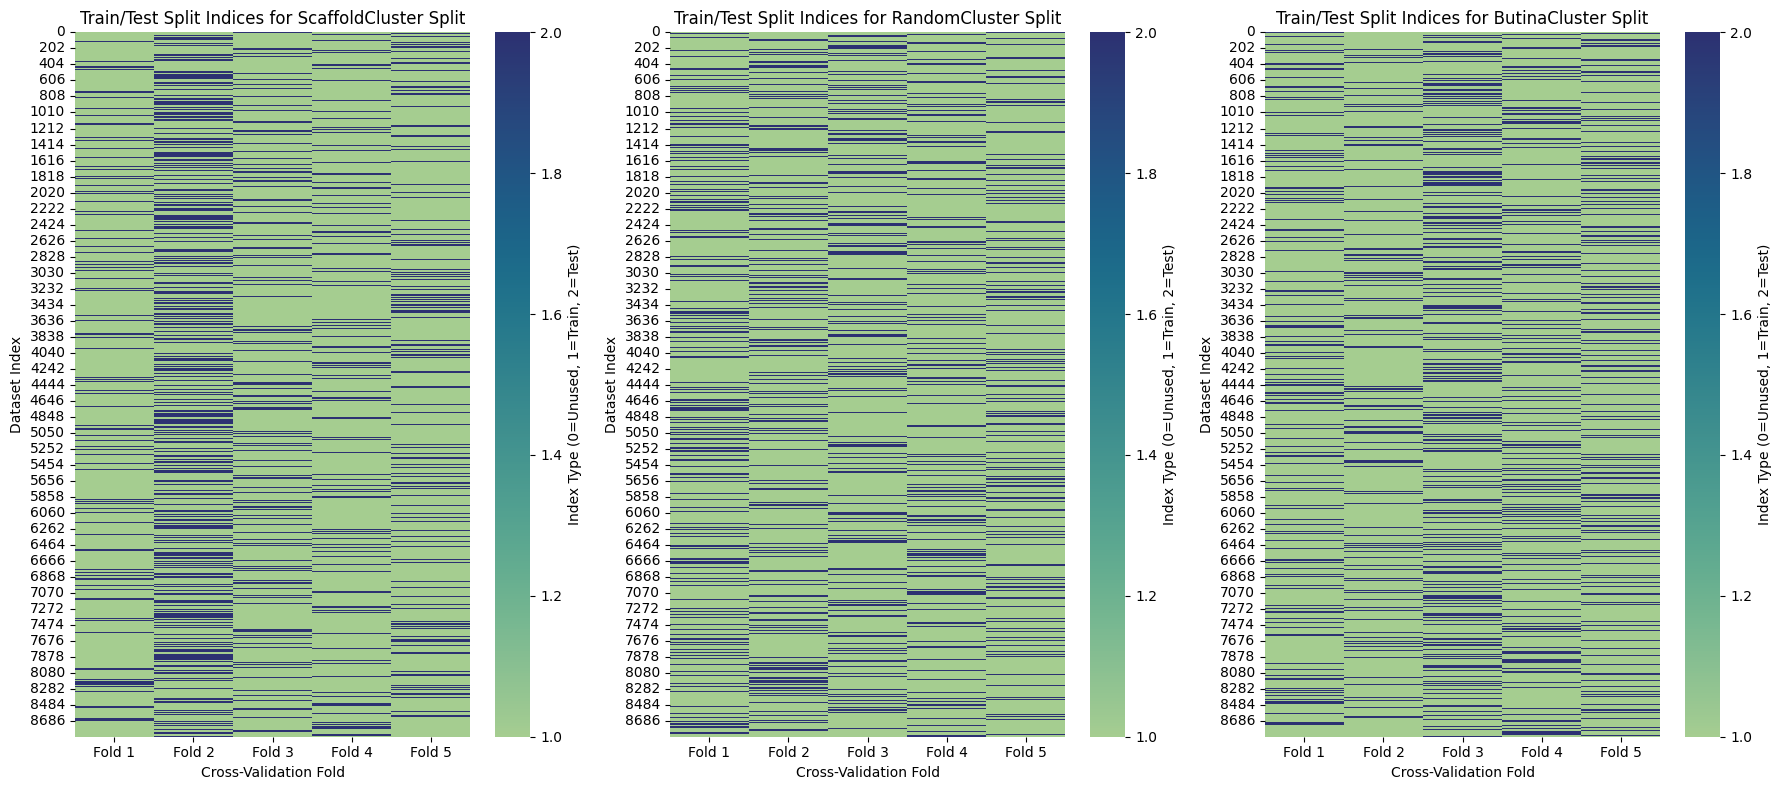

In [11]:
# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Loop through each dataframe and its corresponding axis
for i, (cluster, ax) in enumerate(zip(cluster_list, axes)):
    sns.heatmap(
        map_list[i],
        cmap="crest",
        cbar_kws={"label": "Index Type (0=Unused, 1=Train, 2=Test)"},
        ax=ax,
    )
    ax.set_title(f"Train/Test Split Indices for {cluster} Split")
    ax.set_xlabel("Cross-Validation Fold")
    ax.set_ylabel("Dataset Index")

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

In the above heatmaps, we see how uneven are the Cluster based techniques heatmaps while the random cluster was more uniform.

In [ ]:
# Generate statistics for each clustering method
for cluster in cluster_list:

    # To store statistics for each fold
    fold_indices = []
    stats = []

    for fold, (train_idx, test_idx) in enumerate(
        group_kfold_shuffle.split(np.stack(data["Fingerprint"]), data["LOG_SOLUBILITY"], list(data[cluster]))
    ):
        # Initialize zeros for all indices
        indices = np.zeros(data.shape[0])

        # Mark train indices
        indices[train_idx] = 1

        # Mark test indices
        indices[test_idx] = 2
        fold_indices.append(indices)

        # Calculate statistics for the current fold
        train_count = np.sum(indices == 1)
        test_count = np.sum(indices == 2)
        stats.append({"Fold": f"Fold {fold + 1}", "Train": train_count, "Test": test_count})

    # Display statistics
    stats_df = pd.DataFrame(stats)
    print(f"Statistics for {cluster} Split:")
    display(stats_df)
    print("\n")

Statistics for ScaffoldCluster Split:


,Fold,Train,Test
0,Fold 1,7649,1232
1,Fold 2,5248,3633
2,Fold 3,7525,1356
3,Fold 4,7648,1233
4,Fold 5,7454,1427




Statistics for RandomCluster Split:


,Fold,Train,Test
0,Fold 1,7104,1777
1,Fold 2,7105,1776
2,Fold 3,7105,1776
3,Fold 4,7105,1776
4,Fold 5,7105,1776




Statistics for ButinaCluster Split:


,Fold,Train,Test
0,Fold 1,7559,1322
1,Fold 2,7535,1346
2,Fold 3,6284,2597
3,Fold 4,7061,1820
4,Fold 5,7085,1796


This shows that random cluster always had the same amount for training and testing while it was variable among the other splits, which can provide higher consistency in the results.

Here we perform regression and 5 - fold cross validation to obtain the mean absolute error (MAE) for each fold and display the average MAE for each split.

In [ ]:
group_kfold_shuffle = GroupKFoldShuffle(n_splits=5, shuffle=True, random_state=42)

# Iterate for each model for regression
for key, _ in model_dict_reg.items():

  #Iterate over each type of clustering method
  for cluster in cluster_list:

    # Initialize a list for each model, cluster pair to calculate the average mean absolute error
    fold_list = []

    #Loop over each fold
    for train, test in group_kfold_shuffle.split(np.stack(data["Fingerprint"]), data["LOG_SOLUBILITY"], list(data[cluster])):

      # Extract train and test subsets for the current fold
      X_train, X_test = np.stack(data["Fingerprint"].iloc[train].values), np.stack(data["Fingerprint"].iloc[test].values)
      y_train, y_test = np.stack(data["LOG_SOLUBILITY"].iloc[train]).reshape(-1, 1).reshape(-1), np.stack(data["LOG_SOLUBILITY"].iloc[test]).reshape(-1, 1).reshape(-1)

      # Fit the machine learning model
      model = model_dict_reg[key]
      model.fit(X_train, y_train)

      # Predict the solubility values
      test_predictions = model.predict(X_test)

      # Calculate the mean absolute error
      mae = mean_absolute_error(y_test, test_predictions)
      fold_list.append(mae)
      fold_dict[(key, cluster)].append(mae)

    result_dfs[model_type[0]].at[cluster, key] = np.mean(fold_list)

# Display the dataframe
display(result_dfs[model_type[0]])

,linear_regression,random_forest_regressor
ScaffoldCluster,1.233373,0.921551
RandomCluster,1.025182,0.758968
ButinaCluster,1.167678,0.898539


Here we perform classification and 5 - fold cross validation to obtain the accuracy of the model in each fold and display the average accuracy for each split.

In [ ]:
group_kfold_shuffle = GroupKFoldShuffle(n_splits=5, shuffle=True, random_state=42)

# Iterate for each model for classification
for key, _ in model_dict_class.items():

  #Iterate over each type of clustering method
  for cluster in cluster_list:

    # Initialize a list for each model, cluster pair to calculate the average accuracy
    fold_list = []

    #Loop over each fold
    for train, test in group_kfold_shuffle.split(np.stack(data["Fingerprint"]), data["Class"], list(data[cluster])):

      # Extract train and test subsets for the current fold
      X_train, X_test = np.stack(data["Fingerprint"].iloc[train].values), np.stack(data["Fingerprint"].iloc[test].values)
      y_train, y_test = np.stack(data["Class"].iloc[train]).reshape(-1, 1).reshape(-1), np.stack(data["Class"].iloc[test]).reshape(-1, 1).reshape(-1)

      # Fit the machine learning model
      model = model_dict_class[key]
      model.fit(X_train, y_train)

      # Predict the classes
      test_predictions = model.predict(X_test)

      # Calculate the accuracy
      accuracy = accuracy_score(y_test, test_predictions)
      fold_list.append(accuracy)
      fold_dict[(key, cluster)].append(accuracy)

    result_dfs[model_type[1]].at[cluster, key] = np.mean(fold_list)

# Display the dataframe
display(result_dfs[model_type[1]])

,logistic_regression,random_forest_classifier
ScaffoldCluster,0.46527,0.518413
RandomCluster,0.529895,0.596216
ButinaCluster,0.476473,0.535971


#### Creating catplots

A catplot or categorical plot is a plot used to represent categorical variables. Here, we create catplots to further understand how our choice in ML models and splitting method affects the MAE or Accuracy.

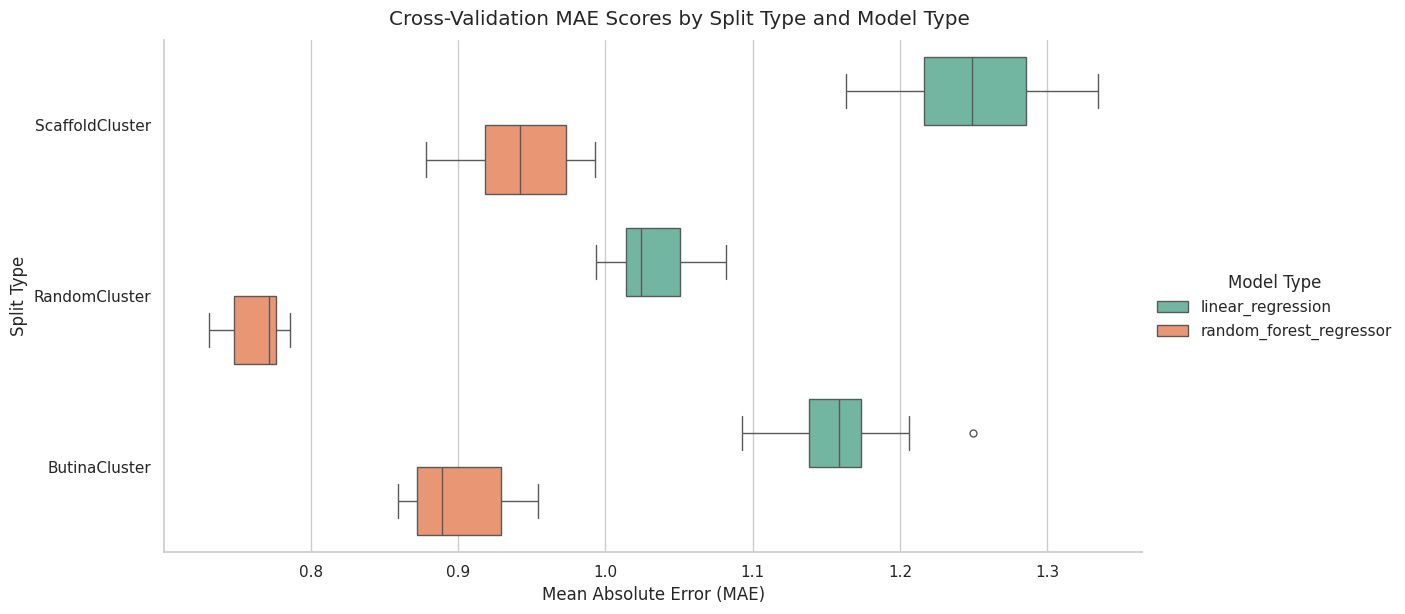

In [ ]:
# Combine MAE results for visualization
mae_data = []
for model in model_dict_reg.keys():
    for cluster in cluster_list:
        for mae in fold_dict[(model, cluster)]:
            mae_data.append({"Split Type": cluster, "Model Type": model, "MAE": mae})

# Convert to DataFrame
mae_df = pd.DataFrame(mae_data)

# Create catplot
sns.set(style="whitegrid")
catplot = sns.catplot(
    data=mae_df,
    x="MAE",
    y="Split Type",
    hue="Model Type",
    kind="box",
    height=6,
    aspect=2,
    palette="Set2"
)
catplot.set_axis_labels("Mean Absolute Error (MAE)", "Split Type")
catplot.fig.suptitle("Cross-Validation MAE Scores by Split Type and Model Type", y=1.02)
plt.show()


This plot shows how that MAE scores had similar values among its folds for the random clustering, while this was not the case for the cluster-based splits. Also, the plot shows that random forest regressor constantly outperforms the linear regression.

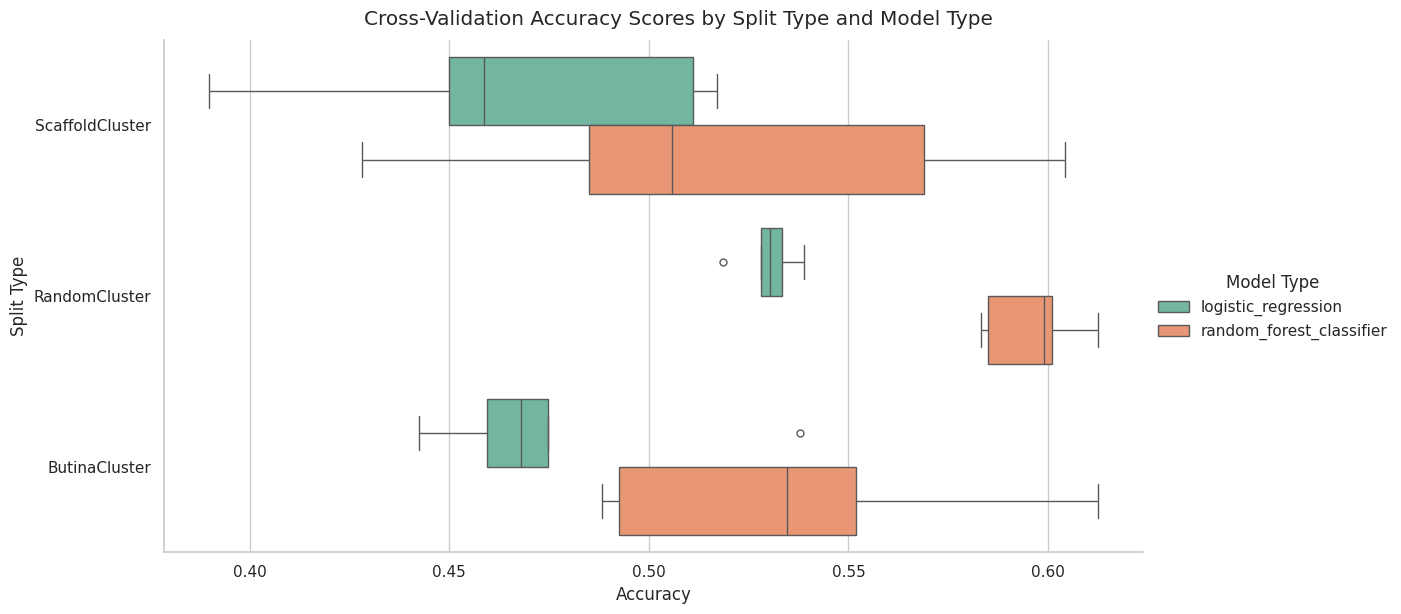

In [ ]:
# Combine Accuracy results for visualization
acc_data = []
for model in model_dict_class.keys():
    for cluster in cluster_list:
        for acc in fold_dict[(model, cluster)]:
            acc_data.append({"Split Type": cluster, "Model Type": model, "Accuracy": acc})

# Convert to DataFrame
acc_df = pd.DataFrame(acc_data)

# Create catplot
sns.set(style="whitegrid")
catplot = sns.catplot(
    data=acc_df,
    x="Accuracy",
    y="Split Type",
    hue="Model Type",
    kind="box",
    height=6,
    aspect=2,
    palette="Set2"
)
catplot.set_axis_labels("Accuracy", "Split Type")
catplot.fig.suptitle("Cross-Validation Accuracy Scores by Split Type and Model Type", y=1.02)
plt.show()

Random forest classifier consistently achieves higher accuracy than logistic regression across all split types.

Scaffold splits introduce greater variability, while Butina splits yield more stable but slightly lower accuracies and both outperformed by the random splits.

#### Tukey's Range Test

In the following cell, we perform tukey's HSD test and generate the plots.

In [ ]:
# Gather MAE or accuracy results from different splits
df_list_reg = []
df_list_class = []
tukey_results = []
titles = []

# For each method
for i in range(len(model_type)):

  # For each model
  for model in dict_list[i].keys():

    results = {
        "Scaffold": fold_dict[(model, 'ScaffoldCluster')],
        "Random": fold_dict[(model, 'RandomCluster')],
        "Butina": fold_dict[(model, 'ButinaCluster')],
    }

    # Create a list of titles
    title = f"Results for {model}: "
    titles.append(title)

    # Test for regression
    if model in model_dict_reg.keys():

      # Convert results into a long-format DataFrame for statistical tests
      regdata = []
      for split_name, mae_values in results.items():
          for mae in mae_values:
              regdata.append({"Split": split_name, "MAE": mae})

      df = pd.DataFrame(regdata)
      df_list_reg.append(df)

      # Perform Tukey's HSD Test
      tukey = pairwise_tukeyhsd(df['MAE'], df['Split'], alpha=0.05)
      print(f"Results for {model}:")
      print(tukey)
      print("\n")

      # Append the plots
      tukey_results.append(tukey)

    # Test for classification
    if model in model_dict_class.keys():

      # Convert results into a long-format DataFrame for statistical tests
      cladata = []
      for split_name, acc_values in results.items():
          for acc in acc_values:
              cladata.append({"Split": split_name, "Accuracy": acc})

      df = pd.DataFrame(cladata)
      df_list_class.append(df)

      # Perform Tukey's HSD Test
      tukey = pairwise_tukeyhsd(df['Accuracy'], df['Split'], alpha=0.05)
      print(f"Results for {model}:")
      print(tukey)
      print("\n")

      # Append the plots
      tukey_results.append(tukey)

Results for linear_regression:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Butina   Random  -0.1425 0.0019  -0.227 -0.058   True
Butina Scaffold   0.0657 0.1372 -0.0188 0.1502  False
Random Scaffold   0.2082 0.0001  0.1237 0.2927   True
-----------------------------------------------------


Results for random_forest_regressor:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2  meandiff p-adj   lower   upper  reject
------------------------------------------------------
Butina   Random  -0.1396 0.0015 -0.2199 -0.0593   True
Butina Scaffold    0.023 0.7308 -0.0573  0.1033  False
Random Scaffold   0.1626 0.0004  0.0823  0.2429   True
------------------------------------------------------


Results for logistic_regression:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2  meandiff p-adj   lower   upper  reject
----------------------

#### Explanation of the results of Tukey's HSD test

#### Linear Regression
- Butina vs. Random: The Tukey HSD test shows a significant difference (
$p$ =0.0019).
- Butina vs. Scaffold: No significant difference (
$p$ =0.1372), suggesting that Butina and scaffold splits yield comparable results.
- Random vs. Scaffold: A significant difference (
$p$ =0.0001) exists.

Tukey's Plot Insight: The plot shows non-overlapping confidence intervals for Butina vs. Random and Random vs. Scaffold comparisons.

#### Random Forest Regressor
- Butina vs. Random: A significant difference (
$p$ =0.0015), with Butina outperforming random splits.
- Butina vs. Scaffold: No significant difference (
$p$ =0.7308), highlighting comparable effectiveness between these two methods.
- Random vs. Scaffold: A significant difference ( $p$ =0.0004) is observed.

Tukey's Plot Insight: Similar to linear regression, the plot shows Butina and scaffold splits are comparable while being outperformed by the random splits. This is mostly because random splits had the some similar structures (fingerprints) both in training and test set.

#### Logistic Regression

- Butina vs. Random: No significant difference (
$p$ =0.1012
), indicating that both splitting strategies yield similar performance for logistic regression.
- Butina vs. Scaffold: No significant difference (
$p$ =0.8954
), suggesting comparable results.
- Random vs. Scaffold: A marginally significant difference (
$p$ =0.0466
), with scaffold splits slightly outperforming random splits.

Tukey's Plot Insight: Confidence intervals for Butina and Random overlap, while the scaffold split is barely separated from the random split.

#### Random Forest Classifier
- Butina vs. Random: No significant difference (
$p$ =0.2012).
- Butina vs. Scaffold: No significant difference (
$p$ =0.8466).
- Random vs. Scaffold: No significant difference ( $p$ =0.0817).

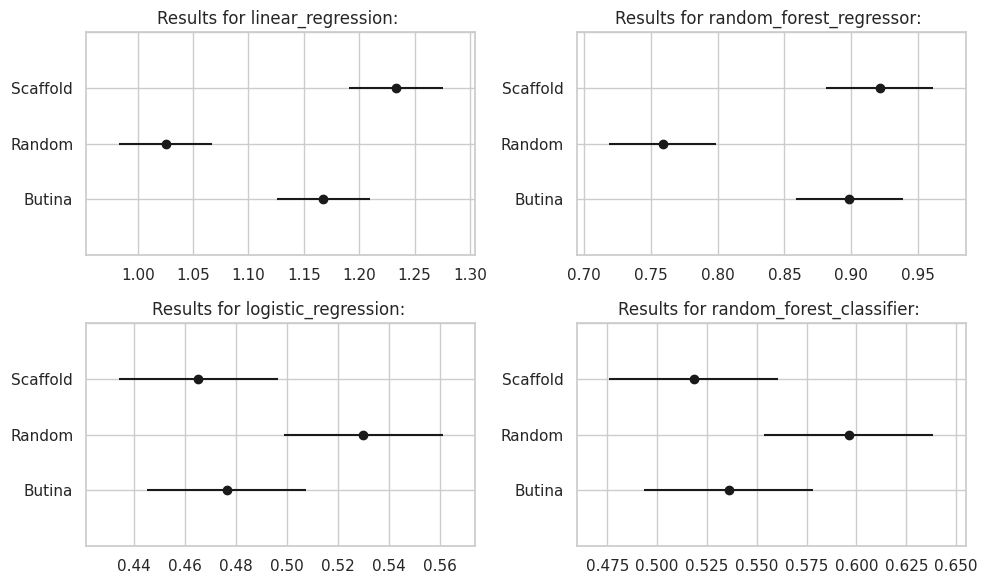

In [ ]:
# Code to generate plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (tukey, ax) in enumerate(zip(tukey_results, axes.flatten())):

    tukey.plot_simultaneous(ax=ax)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

Tukey's Plot Insight: The confidence intervals for all groups overlap substantially, suggesting no strong advantage for any splitting method in this scenario.

#### Discussion


Overview and Key Findings

This project aimed to evaluate the influence of different data splitting strategies and cross-validation techniques on machine learning model performance, particularly focusing on linear regression and random forest models. The study analyzed train-test splits across several clustering methods and quantified their impact on predictive accuracy (via MAE scores) and dataset representation (visualized through heatmaps).

Key findings:

* Impact of Splitting Methods: Different splitting strategies, such as random and
cluster-based splits, produced varying training and testing dataset distributions, directly influencing model performance. Cluster-based splits exhibited higher variability in MAE scores compared to random splits, likely due to uneven representation of data clusters across folds.

* Train/Test Size Variations: Statistical analysis showed significant differences in the number of data points assigned to training versus testing datasets across folds. This discrepancy emphasizes the importance of carefully balancing split sizes to avoid biased evaluations.

Why Results Were Observed

* Cluster-Based Splits: The higher variability in MAE scores is likely due to the inherent diversity within clusters. Cluster-based splits group similar samples together, and when entire clusters are excluded from the training set, models may struggle to generalize to unseen clusters.

* Random Splits: Random splits had higher chance to have fingerprints duplicated from the training sets in the test sets, generating lower MAE scores. Also, the fact that it had the same size for training across the 5 folds guaranteed lower variance among its MAE scores

* Heatmap Observations: The heatmaps revealed some folds with disproportionately fewer indices in the training or testing set. This uneven distribution can be explained by the sampling method within each split strategy. Clustering-based methods tend to exclude larger portions of the dataset in some folds, leaving fewer indices for training or testing.

Implications and Recommendations


* Practical Applications: For projects requiring robust generalization across diverse datasets (e.g., molecular property prediction), cluster-based splitting may better simulate real-world conditions but requires careful tuning to avoid overfitting or underfitting.

* Fingerprints generation: Using different flexibility to generate the scaffolds can alter the results, so try to test different fingerprints while approaching your project.


* The dataset size and the number of clusters might limit the generalizability of results.

#### Quiz

1.   What is a molecular fingerprint?
2.   What is the difference between Parametric and Non-Parametric tests?
3.   Why do Random splits have lower MAE than Cluster-based splits?